In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, count, when, isnan, desc

In [5]:
spark = SparkSession.builder \
    .appName("Big Data EDA with PySpark") \
    .getOrCreate()


In [6]:
df = spark.read.csv("bank-full.csv", header=True, inferSchema=True)
df.printSchema()


root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [7]:
df.show(5)


+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management|married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
| 44|  technician| single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
| 33|entrepreneur|married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
| 47| blue-collar|married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
| 33|     unknown| single|  unknown|     no|      1|     no|  no|unknown|  5|  may|     19

In [8]:
df.describe().show()
print("Total Rows:", df.count())


+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+-----------------+-----+-----------------+-----------------+------------------+------------------+--------+-----+
|summary|               age|    job| marital|education|default|           balance|housing| loan| contact|              day|month|         duration|         campaign|             pdays|          previous|poutcome|    y|
+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+-----------------+-----+-----------------+-----------------+------------------+------------------+--------+-----+
|  count|             45211|  45211|   45211|    45211|  45211|             45211|  45211|45211|   45211|            45211|45211|            45211|            45211|             45211|             45211|   45211|45211|
|   mean| 40.93621021432837|   NULL|    NULL|     NULL|   NULL|1362.2720576850766|   NULL| NULL|    NULL|15.80641879188693| 

In [9]:
from pyspark.sql.functions import countDistinct

for column in df.columns:
    distinct_count = df.select(countDistinct(column)).collect()[0][0]
    print(f"{column} has {distinct_count} unique values.")


age has 77 unique values.
job has 12 unique values.
marital has 3 unique values.
education has 4 unique values.
default has 2 unique values.
balance has 7168 unique values.
housing has 2 unique values.
loan has 2 unique values.
contact has 3 unique values.
day has 31 unique values.
month has 12 unique values.
duration has 1573 unique values.
campaign has 48 unique values.
pdays has 559 unique values.
previous has 41 unique values.
poutcome has 4 unique values.
y has 2 unique values.


In [15]:
from pyspark.sql.functions import col

# First, filter the dataframe where y == 'yes'
yes_df = df.filter(col("y") == "yes")

print("Most frequent age of customers who subscribe to the term deposit:")

# Find the most frequent age among 'yes' customers
most_frequent_age = (
    yes_df.groupBy("age")
    .count()
    .orderBy(col("count").desc())
    .limit(1)
)

most_frequent_age.show()


Most frequent age of customers who subscribe to the term deposit:
+---+-----+
|age|count|
+---+-----+
| 32|  221|
+---+-----+



In [10]:
from pyspark.sql.functions import col

for column in df.columns:
    print(f"Most frequent value for {column}:")
    df.groupBy(column).count().orderBy("count", ascending=False).show(1)


Most frequent value for age:
+---+-----+
|age|count|
+---+-----+
| 32| 2085|
+---+-----+
only showing top 1 row

Most frequent value for job:
+-----------+-----+
|        job|count|
+-----------+-----+
|blue-collar| 9732|
+-----------+-----+
only showing top 1 row

Most frequent value for marital:
+-------+-----+
|marital|count|
+-------+-----+
|married|27214|
+-------+-----+
only showing top 1 row

Most frequent value for education:
+---------+-----+
|education|count|
+---------+-----+
|secondary|23202|
+---------+-----+
only showing top 1 row

Most frequent value for default:
+-------+-----+
|default|count|
+-------+-----+
|     no|44396|
+-------+-----+
only showing top 1 row

Most frequent value for balance:
+-------+-----+
|balance|count|
+-------+-----+
|      0| 3514|
+-------+-----+
only showing top 1 row

Most frequent value for housing:
+-------+-----+
|housing|count|
+-------+-----+
|    yes|25130|
+-------+-----+
only showing top 1 row

Most frequent value for loan:
+----+-

In [11]:
df.filter(df["balance"] > 10000).select("age", "job", "balance").show()

+---+------------+-------+
|age|         job|balance|
+---+------------+-------+
| 51|  management|  10635|
| 35| blue-collar|  12223|
| 45|  management|  24598|
| 39|  technician|  45248|
| 44|      admin.|  58544|
| 34|entrepreneur|  10350|
| 55|     retired|  18722|
| 26|  technician|  24299|
| 59|  management|  13308|
| 28|  technician|  26765|
| 51|  technician|  12061|
| 49|  management|  12482|
| 44|    services|  29312|
| 45|  management|  37378|
| 37| blue-collar|  15801|
| 55|  management|  23189|
| 49| blue-collar|  11317|
| 48|  management|  20718|
| 53|    services|  10749|
| 32|  technician|  10600|
+---+------------+-------+
only showing top 20 rows



In [18]:
df = df.withColumn("blc more than 500", (df["balance"] > 500).cast("int"))
df.select("balance", "blc more than 500").show(7)


+-------+-----------------+
|balance|blc more than 500|
+-------+-----------------+
|   2143|                1|
|     29|                0|
|      2|                0|
|   1506|                1|
|      1|                0|
|    231|                0|
|    447|                0|
+-------+-----------------+
only showing top 7 rows



In [ ]:
df.select("age", "job", "duration").orderBy("duration", ascending=False).show(5)


+---+-----------+--------+
|age|        job|duration|
+---+-----------+--------+
| 59| technician|    4918|
| 59| management|    3881|
| 45|   services|    3785|
| 37|blue-collar|    3422|
| 45|blue-collar|    3366|
+---+-----------+--------+
only showing top 5 rows



In [ ]:
numerical_cols = ['age', 'balance', 'duration', 'campaign']

for col_name in numerical_cols:
    df.selectExpr(f"min({col_name}) as min_{col_name}", f"max({col_name}) as max_{col_name}").show()


+-------+-------+
|min_age|max_age|
+-------+-------+
|     18|     95|
+-------+-------+

+-----------+-----------+
|min_balance|max_balance|
+-----------+-----------+
|      -8019|     102127|
+-----------+-----------+

+------------+------------+
|min_duration|max_duration|
+------------+------------+
|           0|        4918|
+------------+------------+

+------------+------------+
|min_campaign|max_campaign|
+------------+------------+
|           1|          63|
+------------+------------+



In [ ]:
yes_count = df.filter(df["y"] == "yes").count()
no_count = df.filter(df["y"] == "no").count()
print(f"Yes responses: {yes_count}, No responses: {no_count}")


Yes responses: 5289, No responses: 39922


In [ ]:
from pyspark.sql.functions import round, avg

df.groupBy("contact").agg(round(avg("duration"), 2).alias("avg_duration")).show()


+---------+------------+
|  contact|avg_duration|
+---------+------------+
|  unknown|      252.34|
| cellular|      263.01|
|telephone|      235.37|
+---------+------------+



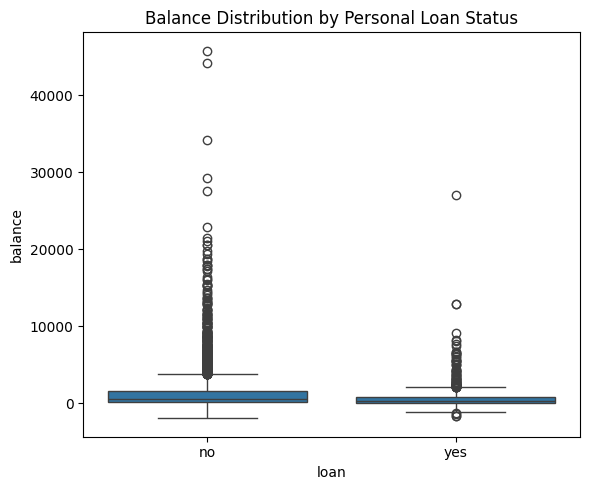

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pdf = df.select("loan", "balance").sample(fraction=0.1, seed=1).toPandas()

plt.figure(figsize=(6, 5))
sns.boxplot(data=pdf, x="loan", y="balance")
plt.title("Balance Distribution by Personal Loan Status")
plt.tight_layout()
plt.show()


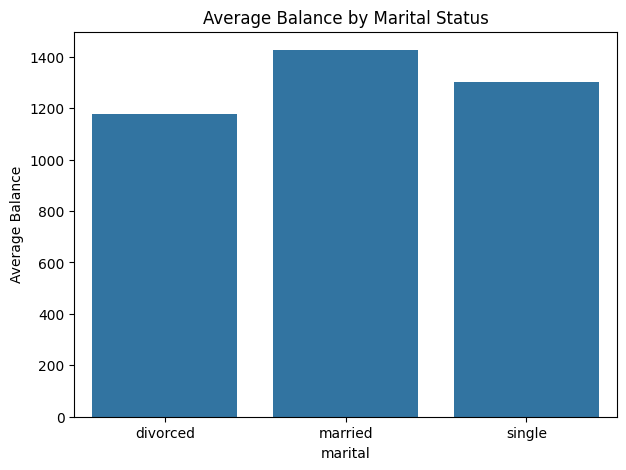

In [ ]:
marital_pdf = df.groupBy("marital").avg("balance").toPandas()

plt.figure(figsize=(7, 5))
sns.barplot(data=marital_pdf, x="marital", y="avg(balance)")
plt.title("Average Balance by Marital Status")
plt.ylabel("Average Balance")
plt.show()


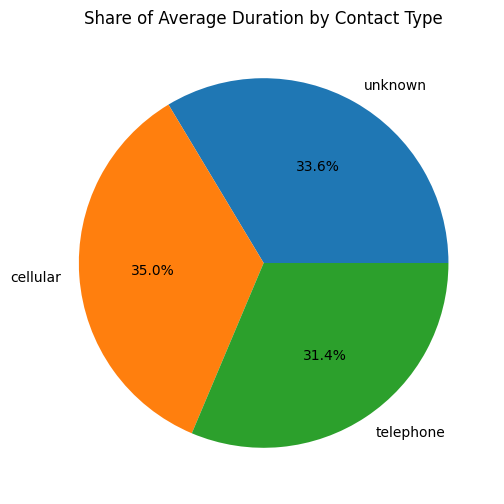

In [ ]:
contact_pdf = df.groupBy("contact").avg("duration").toPandas()
plt.figure(figsize=(6, 6))
plt.pie(contact_pdf["avg(duration)"], labels=contact_pdf["contact"], autopct='%1.1f%%')
plt.title("Share of Average Duration by Contact Type")
plt.show()
